In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_tramites_proc_X = pd.read_parquet('./data/tramita/tramites_autoconsumo.parquet')

In [3]:
df_tramites_proc_X

,id_exp,dni,nif,fecha_alta_exp,fecha_registro_exp,codine_provincia,codine_municipio,codine,municipio,provincia,...,siaci,consejeria_proc,org_instructor_proc,es_telematica,desc_tramite,fecha_tramite,num_tramite,cod_procedimiento,orden_tramite,es_inicial
45875,1127895,1787973,<NA>,2022-02-09 09:07:17,2021-12-23,13,064,13064,Poblete,Ciudad Real,...,SLPT,Consejeria de desarrollo sostenible,Direccion general de transicion energetica,True,Registro de solicitud,2021-12-23 00:00:00,0,884.0,0,False
45876,1127895,1787973,<NA>,2022-02-09 09:07:17,2021-12-23,13,064,13064,Poblete,Ciudad Real,...,SLPT,Consejeria de desarrollo sostenible,Direccion general de transicion energetica,True,1-1-Presentación de la solicitud,2022-02-09 09:07:17,1,884.0,1,True
45877,1127895,1787973,<NA>,2022-02-09 09:07:17,2021-12-23,13,064,13064,Poblete,Ciudad Real,...,SLPT,Consejeria de desarrollo sostenible,Direccion general de transicion energetica,True,10-1-Requerimiento documentación,2022-10-14 09:44:23,10,884.0,2,False
45878,1127895,1787973,<NA>,2022-02-09 09:07:17,2021-12-23,13,064,13064,Poblete,Ciudad Real,...,SLPT,Consejeria de desarrollo sostenible,Direccion general de transicion energetica,True,30-1-Evaluación de Solicitud,2022-10-27 08:04:51,30,884.0,3,False
45879,1127895,1787973,<NA>,2022-02-09 09:07:17,2021-12-23,13,064,13064,Poblete,Ciudad Real,...,SLPT,Consejeria de desarrollo sostenible,Direccion general de transicion energetica,True,42-1-Propuesta Resolución Estimatoria de Conce...,2022-10-27 08:14:55,42,884.0,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124961,1664841,1696284,<NA>,2023-11-03 09:13:13,2023-11-03,13,005,13005,Alcázar de San Juan,Ciudad Real,...,SLPT,Consejeria de desarrollo sostenible,Direccion general de transicion energetica,True,1-1-Presentación de la solicitud,2023-11-03 09:13:13,1,884.0,1,True
9125278,1665715,2096674,<NA>,2023-11-06 08:44:05,2023-11-03,13,053,13053,Manzanares,Ciudad Real,...,SLPT,Consejeria de desarrollo sostenible,Direccion general de transicion energetica,True,Registro de solicitud,2023-11-03 00:00:00,0,884.0,0,False
9125279,1665715,2096674,<NA>,2023-11-06 08:44:05,2023-11-03,13,053,13053,Manzanares,Ciudad Real,...,SLPT,Consejeria de desarrollo sostenible,Direccion general de transicion energetica,True,1-1-Presentación de la solicitud,2023-11-06 08:44:05,1,884.0,1,True
9125280,1665723,2096678,<NA>,2023-11-06 08:44:57,2023-11-03,19,024,19024,Alovera,Guadalajara,...,SLPT,Consejeria de desarrollo sostenible,Direccion general de transicion energetica,True,Registro de solicitud,2023-11-03 00:00:00,0,884.0,0,False


In [4]:
columns_estados = ['id_exp','desc_tramite','fecha_tramite']
df_tramites_proc_X_simple = df_tramites_proc_X[columns_estados]
df_tramites_proc_X_simple = df_tramites_proc_X_simple.rename(columns={'fecha_tramite': 'fecha'})
df_tramites_proc_X_simple.head()

,id_exp,desc_tramite,fecha
45875,1127895,Registro de solicitud,2021-12-23 00:00:00
45876,1127895,1-1-Presentación de la solicitud,2022-02-09 09:07:17
45877,1127895,10-1-Requerimiento documentación,2022-10-14 09:44:23
45878,1127895,30-1-Evaluación de Solicitud,2022-10-27 08:04:51
45879,1127895,42-1-Propuesta Resolución Estimatoria de Conce...,2022-10-27 08:14:55


### todos los estados posibles

In [5]:
df_tramites_proc_X_simple['desc_tramite'].unique()

<StringArray>
[                                          'Registro de solicitud',
                                '1-1-Presentación de la solicitud',
                                '10-1-Requerimiento documentación',
                                    '30-1-Evaluación de Solicitud',
              '42-1-Propuesta Resolución Estimatoria de Concesión',
                                    '50-1-Resolución de Concesión',
                   '70-1-Presentación Documentación Justificativa',
                                '10-2-Requerimiento documentación',
                                '30-2-Evaluación de justificación',
                                                 '82-1-Pago Total',
                                               '287-1-Seguimiento',
  '41-1-Propuesta Resolución Desestimatoria - Incumple Requisitos',
            '51-1-Resolución desestimatoria - Incumple Requisitos',
                     '152-1-Propuesta de Resolucion Desistimiento',
                                  

# Número de procesos por estado/día con date_range

In [6]:
df = df_tramites_proc_X_simple

In [7]:
# Step 1: Sort DataFrame
df = df.sort_values(by=["id_exp", "fecha"])

### quitar duplicados

In [8]:
duplicates = df[df.duplicated(subset=['id_exp', 'fecha', 'desc_tramite'], keep=False)]
duplicates

,id_exp,desc_tramite,fecha
7234997,1171327,51-1-Resolución desestimatoria - Incumple Requ...,2023-10-23 13:03:36
7234998,1171327,51-1-Resolución desestimatoria - Incumple Requ...,2023-10-23 13:03:36
6496786,1239794,50-1-Resolución de Concesión,2024-07-18 07:11:53
6496787,1239794,50-1-Resolución de Concesión,2024-07-18 07:11:53


In [9]:
# drop duplicates
df = df.drop_duplicates(
    subset=['id_exp', 'fecha', 'desc_tramite'], 
    keep='last'
)

In [10]:
# Step 2: Calculate End Date
df["end_date"] = df.groupby("id_exp")["fecha"].shift(-1)
# shift mueve una fila hacia arriba dentro de cada grupo
df.head()

,id_exp,desc_tramite,fecha,end_date
3323569,1083865,Registro de solicitud,2021-12-22 00:00:00,2022-02-04 12:38:10
3323570,1083865,1-1-Presentación de la solicitud,2022-02-04 12:38:10,2022-04-19 08:16:55
3323571,1083865,10-1-Requerimiento documentación,2022-04-19 08:16:55,2022-05-04 12:01:23
3323572,1083865,30-1-Evaluación de Solicitud,2022-05-04 12:01:23,2022-06-08 08:33:19
3323573,1083865,42-1-Propuesta Resolución Estimatoria de Conce...,2022-06-08 08:33:19,2022-08-10 07:30:16


## qué tramites son finales, y cuantos de cada tipo

In [11]:
# qué tramites son último estado
tramites_finales_num = df[df['end_date'].isnull()].groupby('desc_tramite').size()
tramites_finales_num

desc_tramite
1-1-Presentación de la solicitud                                   15152
10-1-Requerimiento documentación                                     397
10-2-Requerimiento documentación                                      92
100-1-Fin de procedimiento                                           682
152-1-Propuesta de Resolucion Desistimiento                           23
278-1-Resolución de Pérdida de Derecho al Cobro Total                  3
283-1-Propuesta Resolución de Pérdida de Derecho al Cobro Total        1
286-1-Presentación Solicitud Desistimiento                             1
287-1-Seguimiento                                                    851
30-1-Evaluación de Solicitud                                           6
309-1-Lista de Reserva Provisional por Insuficiencia de Credito        2
41-1-Propuesta Resolución Desestimatoria - Incumple Requisitos        21
42-1-Propuesta Resolución Estimatoria de Concesión                   949
50-1-Resolución de Concesión          

## quitar expedientes que finalizan en 1-1-Presentación de la solicitud

In [12]:
df_expedientes_fin_presentacion = df[(df['end_date'].isnull()) &
    (df['desc_tramite'] =='1-1-Presentación de la solicitud')]
len(df_expedientes_fin_presentacion)

15152

In [13]:
id_exp_to_remove = df.loc[(df['end_date'].isnull()) &
    (df['desc_tramite'] =='1-1-Presentación de la solicitud'), "id_exp"].unique()

In [14]:
len(id_exp_to_remove)

15152

## plot expedientes a quitar 

In [15]:
df_entrada_id_to_remove = df[(df["id_exp"].isin(id_exp_to_remove)) & (df["desc_tramite"]=='Registro de solicitud')]

In [16]:
df_entrada_id_to_remove.set_index('fecha', inplace=True)

In [17]:
rango_fechas_total = pd.date_range(start = df["fecha"].min().date(), end = df["fecha"].max().date() , freq ="D")
df_entrada_id_to_remove_grp = df_entrada_id_to_remove.resample('D').agg(
    total_exp=('id_exp', 'count')
).reindex(rango_fechas_total, fill_value=0).reset_index(names = 'fecha')

<Axes: title={'center': 'Total Expedientes'}, xlabel='fecha'>

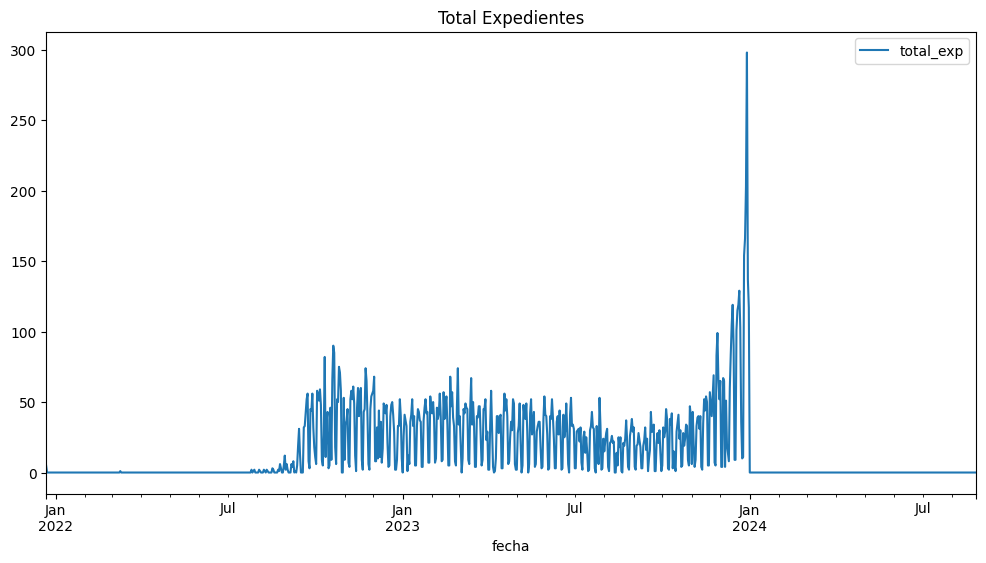

In [18]:
df_entrada_id_to_remove_grp.plot( x='fecha', y='total_exp', figsize=(12, 6), title="Total Expedientes")

In [19]:
len(df.id_exp.unique())

25845

In [20]:
# Filter out rows with those `id_exp` values
filtered_df = df[~df["id_exp"].isin(id_exp_to_remove)]

In [21]:
len(filtered_df.id_exp.unique())

10693

In [22]:
# qué tramites son último estado
tramites_finales_num = filtered_df[filtered_df['end_date'].isnull()].groupby('desc_tramite').size()
tramites_finales_num

desc_tramite
10-1-Requerimiento documentación                                    397
10-2-Requerimiento documentación                                     92
100-1-Fin de procedimiento                                          682
152-1-Propuesta de Resolucion Desistimiento                          23
278-1-Resolución de Pérdida de Derecho al Cobro Total                 3
283-1-Propuesta Resolución de Pérdida de Derecho al Cobro Total       1
286-1-Presentación Solicitud Desistimiento                            1
287-1-Seguimiento                                                   851
30-1-Evaluación de Solicitud                                          6
309-1-Lista de Reserva Provisional por Insuficiencia de Credito       2
41-1-Propuesta Resolución Desestimatoria - Incumple Requisitos       21
42-1-Propuesta Resolución Estimatoria de Concesión                  949
50-1-Resolución de Concesión                                       3860
51-1-Resolución desestimatoria - Incumple Requisito

## expandir fechas (en el último trámite se pone la fecha de fin el mismo dia que se genera)

In [23]:
# Step 3: Expand Dates
expanded_rows = []
for _, row in filtered_df.iterrows():
    # para cada estado de cada expediente se genera una línea por cada día en el rango de fechas
    if pd.notnull(row["end_date"]):
        # Check if end_date is at least one day later than start date
        date_range = pd.date_range(start=row["fecha"].date(), end= row["end_date"].date())
    else:
        date_range = pd.date_range(start=row["fecha"].date(), end= row["fecha"].date())  #  end date the same as start
    for date in date_range:
        expanded_rows.append((date, row["desc_tramite"]))
        # expanded_rows.append((date, row["desc_tramite"], row['id_exp'])) para debugear
expanded_df = pd.DataFrame(expanded_rows, columns=["fecha", "desc_tramite"])
# expanded_df = pd.DataFrame(expanded_rows, columns=["fecha", "desc_tramite", "id_exp"])
expanded_df.head()

# for _, row in df.iterrows():
# The underscore (_) in that line is a convention in Python used as a throwaway variable - it indicates that we don't care about or won't use that particular value.
# In df.iterrows(), the function returns two values for each row:

# The index number of the row
# The actual row data

# So when you write for _, row in df.iterrows():, you're saying "I want to work with the row data, 
# but I don't care about the index number." The underscore is just a placeholder for that index value we're choosing to ignore.

,fecha,desc_tramite
0,2021-12-22,Registro de solicitud
1,2021-12-23,Registro de solicitud
2,2021-12-24,Registro de solicitud
3,2021-12-25,Registro de solicitud
4,2021-12-26,Registro de solicitud


### para comprobar en excel los estados, 1084489 id_exp buen candidato

In [24]:
# # Step 3: Expand Dates
# expanded_rows = []
# for _, row in filtered_df.iterrows():
#     # para cada estado de cada expediente se genera una línea por cada día en el rango de fechas
#     if pd.notnull(row["end_date"]):
#         date_range = pd.date_range(start=row["fecha"], end= row["end_date"])
#     else:
#         date_range = pd.date_range(start=row["fecha"], end= row["fecha"])  #  end date the same as start
#     for date in date_range:
#         expanded_rows.append((date, row["desc_tramite"], row['id_exp'])) #para debugear
# expanded_df_debug = pd.DataFrame(expanded_rows, columns=["fecha", "desc_tramite", "id_exp"])

In [25]:
# expanded_df_debug.to_csv('./data/tramita/full/expanded_forloop.csv', encoding='utf-8',  sep=';', index = False)

In [26]:
expanded_df[expanded_df['fecha']=='2021-12-22'].count()
# para una fecha debe salir el número de expedientes en cualquier estado ese día

fecha           312
desc_tramite    312
dtype: int64

In [27]:
len(expanded_df)

7814058

In [28]:
# Step 4: Aggregate by Date and State
aggregated_df = expanded_df.groupby(["fecha", "desc_tramite"]).size().reset_index(name="count")
aggregated_df.head()

,fecha,desc_tramite,count
0,2021-12-22,Registro de solicitud,312
1,2021-12-23,Registro de solicitud,594
2,2021-12-24,Registro de solicitud,718
3,2021-12-25,Registro de solicitud,740
4,2021-12-26,Registro de solicitud,792


In [29]:
# Step 5: Pivot for Plotting
pivot_df = aggregated_df.pivot(index="fecha", columns="desc_tramite", values="count").fillna(0).astype(int)
pivot_df.head()

desc_tramite,1-1-Presentación de la solicitud,10-1-Requerimiento documentación,10-2-Requerimiento documentación,100-1-Fin de procedimiento,152-1-Propuesta de Resolucion Desistimiento,21-1-Presentación de Renuncia,278-1-Resolución de Pérdida de Derecho al Cobro Total,278-2-Resolucion de perdida parcial de derecho al cobro,283-1-Propuesta Resolución de Pérdida de Derecho al Cobro Total,286-1-Presentación Solicitud Desistimiento,...,42-3-Propuesta Resolución Estimatoria Abono Pérdida Parcial,50-1-Resolución de Concesión,51-1-Resolución desestimatoria - Incumple Requisitos,52-1-Resolucion Desistimiento,53-1-Resolución Aceptación de Renuncia,70-1-Presentación Documentación Justificativa,82-1-Pago Total,82-2-Pago Parcial,90-1-Recurso de alzada,Registro de solicitud
fecha,,,,,,,,,,,,,,,,,,,,,
2021-12-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,312
2021-12-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,594
2021-12-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,718
2021-12-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,740
2021-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,792


In [30]:
# Create a complete date range from min to max date
# all_dates = pd.date_range(start=pivot_df.index.min(), end=pivot_df.index.max(), freq='D')
# pivot_df = pivot_df.reindex(all_dates, fill_value=0)

In [31]:
#pivot_df.to_csv('./data/tramita/full/forloop_total.csv', encoding='utf-8',  sep=';', index = True, index_label='fecha')

In [32]:
pivot_df.to_parquet('./data/tramita/acumulado_autoconsumo.parquet')

In [33]:
column_states = ['Registro de solicitud',
                 '1-1-Presentación de la solicitud',
                #'287-1-Seguimiento',
                 '42-1-Propuesta Resolución Estimatoria de Concesión',
                ]
df_toplot = pivot_df[column_states]

In [34]:
plt.close('all')

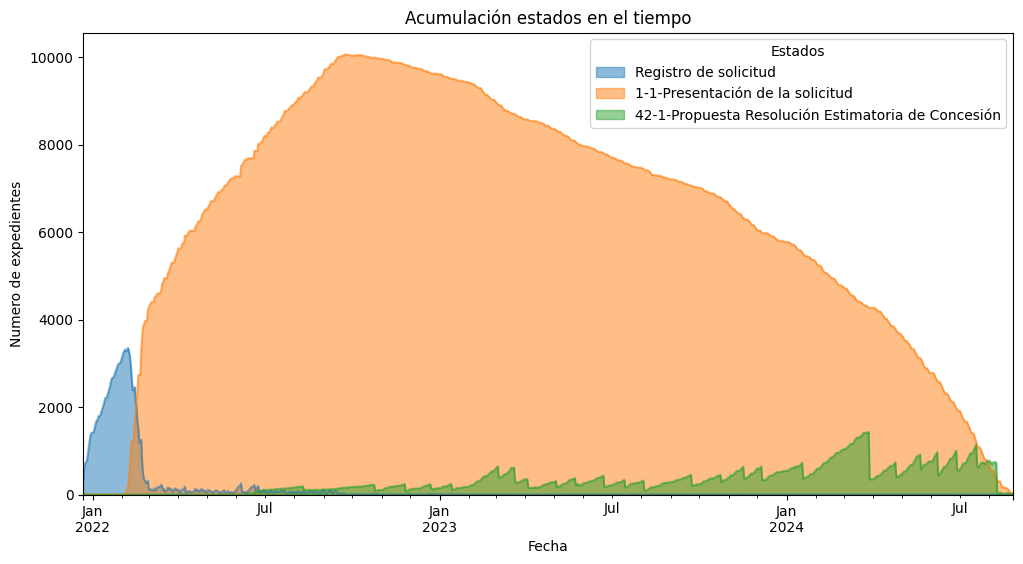

In [35]:
# Step 7: Plot
df_toplot.plot(kind="area", stacked=False, figsize=(12, 6), legend=dict(loc='upper right'))
plt.title("Acumulación estados en el tiempo")
plt.xlabel("Fecha")
plt.ylabel("Numero de expedientes")
plt.legend(title="Estados")
plt.show()

In [36]:
# Check current memory usage
import psutil
print(f"Memory used: {psutil.Process().memory_info().rss / 1024 / 1024:.2f} MB")

# See system memory
print(f"Total system memory: {psutil.virtual_memory().total / 1024 / 1024:.2f} MB")
print(f"Available memory: {psutil.virtual_memory().available / 1024 / 1024:.2f} MB")

Memory used: 2034.39 MB
Total system memory: 16071.79 MB
Available memory: 6996.46 MB
